<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Data Processing and Clustering</title>
  <style>
    body {
      font-family: 'Nunito', Tahoma, Geneva, Verdana, sans-serif;
      line-height: 1.6;
      margin: 0;
      padding: 2rem;
      background-color: #f4f4f4;
      color: #333;
    }
    h1 {
      background-color: #006494;
      color: white;
      text-align: center;
      padding: 1rem;
      border-radius: 10px;
    }
    .container {
      max-width: 800px;
      margin: 0 auto;
      background: white;
      padding: 2rem;
      border-radius: 8px;
      box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
    }
    h2 {
      color: #13293d; 
      border-bottom: 2px solid #eee;
      padding-bottom: 1rem;
      margin-bottom: 2rem;
    }
    h3 {
      color: #333;
      margin-top: 1.5rem;
      margin-bottom: 0.5rem;
    }
    p {
      margin-bottom: 1rem;
    }
    ul {
      margin-bottom: 1.5rem;
      list-style-type: disc;
      margin-left: 2rem;
    }
    li {
      margin-bottom: 0.5rem;
    }
    strong {
      font-weight: 600;
    }
    code {
      background-color: #eee;
      padding: 0.2rem 0.4rem;
      border-radius: 4px;
      font-family: 'Nunito', Courier, monospace;
    }
  </style>
</head>
<body>
  <h1>Data Processing and Clustering</h1>
  <div class="container">
    <h2>Steps for Data Processing</h2>
    <h3>1. Load and Prepare Data</h3>
    <p>Load the dataset and prepare it for analysis by cleaning and formatting the data.</p>
    <h3>2. Drop Unnecessary Columns</h3>
    <p>Remove columns that are irrelevant or redundant for the analysis to simplify the dataset.</p>
    <h3>3. Scale Data</h3>
    <p>Standardize or normalize the data using <code>StandardScaler</code> or other scaling techniques.</p>
    <h3>4. Perform PCA</h3>
    <p>Apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining the most important information.</p>
    <h3>5. Determine Number of Clusters</h3>
    <p>Use methods like the <strong>Elbow Method</strong> or <strong>Silhouette Score</strong> to identify the optimal number of clusters for the data.</p>
    <h3>6. Perform Hierarchical Clustering</h3>
    <p>Cluster the data using hierarchical clustering techniques, such as <code>AgglomerativeClustering</code>.</p>
    <h3>7. Analyze Clusters</h3>
    <p>Analyze the resulting clusters by visualizing and summarizing their characteristics to draw insights.</p>
    <h3>8. Visualize Results</h3>
    <p>Use 3D scatter plots and other visualization techniques to understand the cluster distribution and characteristics.</p>
    <br>
  </div>
</body>
</html>



In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) 

# Load and Prepare Data

In [55]:
raw_data = pd.read_csv('data/feature_data.csv')
raw_data

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Living_With,Customer_For,Family_Size,Is_Parent
0,5524,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,0,0,663,1,0
1,2174,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,2,0,113,3,1
2,4141,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,0,1,312,2,0
3,6182,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,1,1,139,3,1
4,5324,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,1,1,161,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,2,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1341,1,1,381,3,1
2208,4001,4,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,444,3,1,19,5,1
2209,7270,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,1241,0,0,155,1,0
2210,8235,3,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,843,1,1,156,3,1


# Drop Unnecessary Columns

In [56]:
columns_to_drop = ['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
                   'AcceptedCmp2', 'NumDealsPurchases', 'NumWebVisitsMonth', 'Kidhome', 'Teenhome', 'Complain', 'Living_With']

data = raw_data.drop(columns=columns_to_drop)
data

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,Age,Spent,Children,Customer_For,Family_Size,Is_Parent
0,2,58138.0,58,635,88,546,172,88,88,8,10,4,1,57,1617,0,663,1,0
1,2,46344.0,38,11,1,6,2,1,6,1,1,2,0,60,27,2,113,3,1
2,2,71613.0,26,426,49,127,111,21,42,8,2,10,0,49,776,0,312,2,0
3,2,26646.0,26,11,4,20,10,3,5,2,0,4,0,30,53,1,139,3,1
4,4,58293.0,94,173,43,118,46,27,15,5,3,6,0,33,422,1,161,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2,61223.0,46,709,43,182,42,118,247,9,3,4,0,47,1341,1,381,3,1
2208,4,64014.0,56,406,0,30,0,0,8,8,2,5,0,68,444,3,19,5,1
2209,2,56981.0,91,908,48,217,32,12,24,2,3,13,0,33,1241,0,155,1,0
2210,3,69245.0,8,428,30,214,80,30,61,6,5,10,0,58,843,1,156,3,1


# Scale Data

In [57]:
def apply_scaler(data, scaler):  
    scaled_data = scaler.fit_transform(data)
    return scaled_data

data_scaled = apply_scaler(data, StandardScaler())
data_scaled

array([[-0.4588495 ,  0.28710487,  0.31035323, ...,  1.5277208 ,
        -1.75835869, -1.58113883],
       [-0.4588495 , -0.26088203, -0.38081349, ..., -1.18901134,
         0.44907004,  0.63245553],
       [-0.4588495 ,  0.9131964 , -0.79551352, ..., -0.20604826,
        -0.65464433, -1.58113883],
       ...,
       [-0.4588495 ,  0.23334696,  1.45077832, ..., -0.98155179,
        -1.75835869, -1.58113883],
       [ 0.53720065,  0.80317156, -1.41756357, ..., -0.97661228,
         0.44907004,  0.63245553],
       [ 1.5332508 ,  0.04229031, -0.31169682, ...,  1.32520077,
         1.55278441,  0.63245553]])

# Perform PCA

In [58]:
pca_df = pd.DataFrame(data_scaled)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(pca_df)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df.head

<bound method NDFrame.head of            PC1       PC2       PC3
0     5.367009 -0.952652  0.188907
1    -2.878651  0.236570  0.230794
2     2.193686 -0.596812 -0.002166
3    -2.696960 -1.086757 -0.200122
4    -0.421434  0.525098 -0.075022
...        ...       ...       ...
2207  2.364808  1.667421 -2.071882
2208 -1.942425  4.095745  0.869091
2209  2.323741 -1.636638  0.233210
2210  1.263404  1.635483  0.376734
2211 -1.964850  1.919132  1.822465

[2212 rows x 3 columns]>

# Determine Number of Clusters

Elbow Method to determine the number of clusters to be formed:


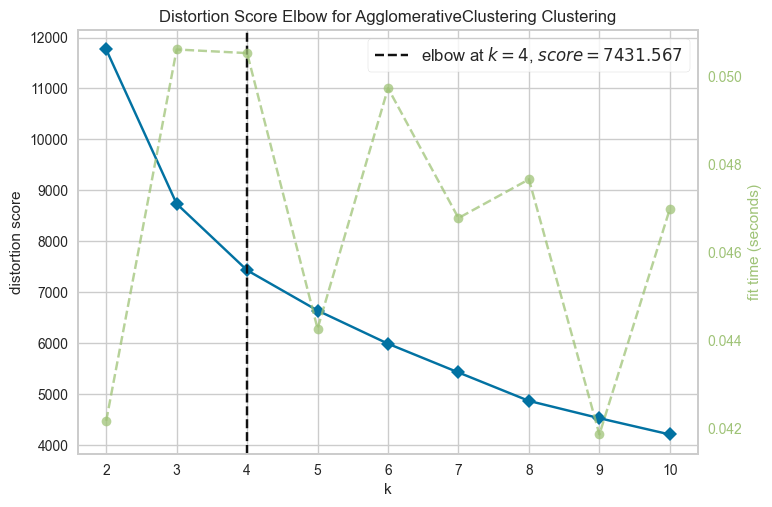

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()

# Perform Hierarchical Clustering

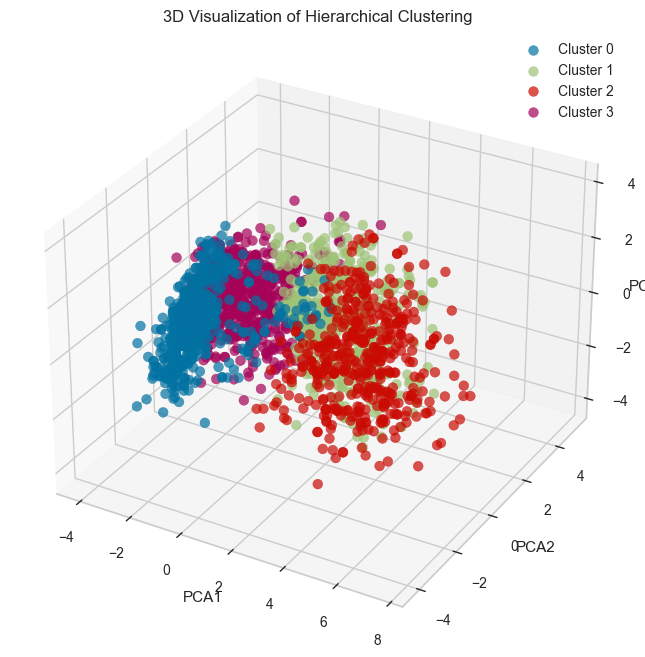

In [60]:
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
pca_df['Cluster'] = hierarchical.fit_predict(pca_df)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(4):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
               label=f'Cluster {cluster}', s=50, alpha=0.7)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
ax.set_title('3D Visualization of Hierarchical Clustering')
plt.show()

# Analyze Clusters

In [61]:
raw_data['Cluster'] = pca_df['Cluster'].values
raw_data

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Living_With,Customer_For,Family_Size,Is_Parent,Cluster
0,5524,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,0,0,663,1,0,2
1,2174,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,2,0,113,3,1,3
2,4141,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,0,1,312,2,0,2
3,6182,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,1,1,139,3,1,0
4,5324,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,1,1,161,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,2,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1341,1,1,381,3,1,1
2208,4001,4,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,444,3,1,19,5,1,3
2209,7270,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,1241,0,0,155,1,0,2
2210,8235,3,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,843,1,1,156,3,1,1


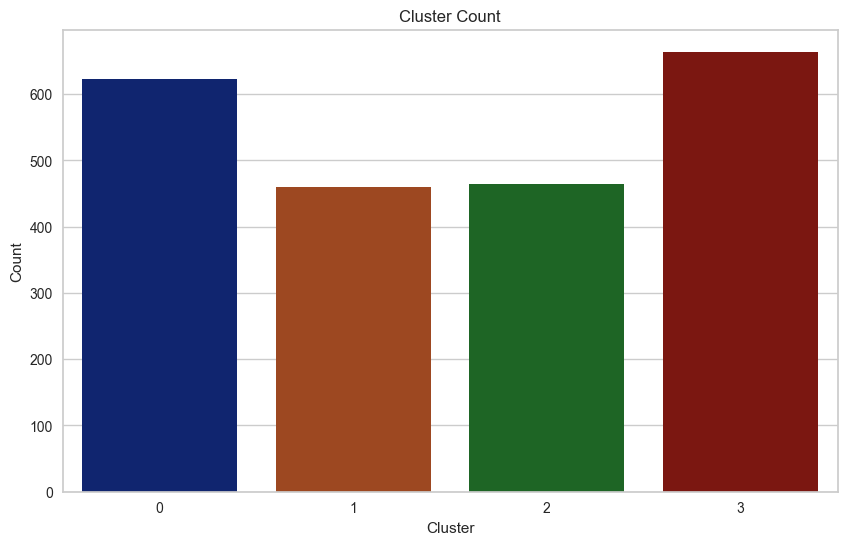

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=raw_data, palette='dark')
plt.title('Cluster Count')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [63]:
cluster_summary = raw_data.groupby('Cluster').mean()
cluster_summary

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Living_With,Customer_For,Family_Size,Is_Parent
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5694.208668,2.247191,32032.194222,0.611557,0.146067,46.313002,50.717496,6.406100,28.881220,9.728732,6.460674,16.003210,1.629213,2.043339,0.624398,3.280899,6.398074,0.072231,0.017657,0.008026,0.004815,0.001605,0.011236,0.118780,39.825040,118.197432,0.757624,0.627608,322.309791,2.385233,0.728732
1,5615.063043,2.593478,64624.932609,0.173913,0.958696,49.647826,579.478261,39.554348,201.845652,54.293478,43.202174,74.976087,3.321739,6.830435,4.182609,8.669565,5.276087,0.076087,0.141304,0.054348,0.058696,0.021739,0.008696,0.123913,48.578261,993.350000,1.132609,0.660870,413.289130,2.793478,0.995652
2,5623.191398,2.492473,76194.159140,0.004301,0.004301,49.150538,618.535484,66.531183,488.853763,97.445161,67.273118,76.731183,1.137634,4.952688,6.146237,8.341935,2.686022,0.086022,0.126882,0.281720,0.232258,0.036559,0.004301,0.335484,45.348387,1415.369892,0.008602,0.580645,359.032258,1.589247,0.008602
3,5435.498494,2.546687,44908.251506,0.774096,0.881024,51.031627,134.819277,7.707831,47.155120,10.438253,6.998494,25.640060,3.117470,3.501506,1.114458,4.417169,6.188253,0.064759,0.043675,0.000000,0.006024,0.003012,0.010542,0.069277,47.420181,232.759036,1.655120,0.697289,338.183735,3.352410,1.000000


# Visualize Results

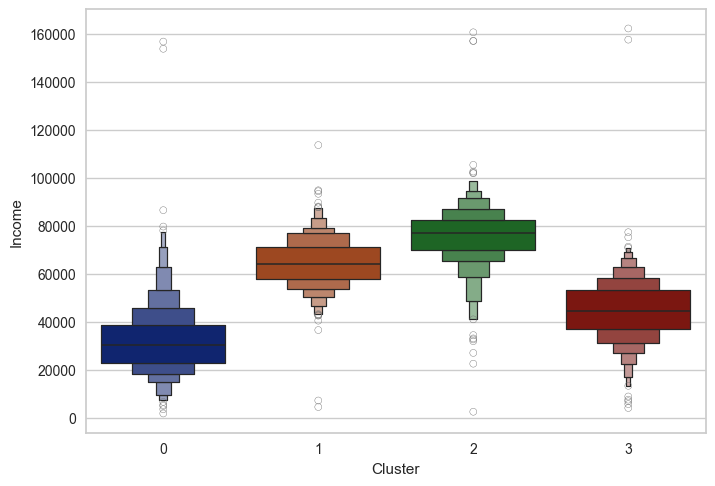

In [64]:
plt.figure()
pl = sns.boxenplot(x=raw_data["Cluster"], y=raw_data["Income"], palette='dark')
plt.show()


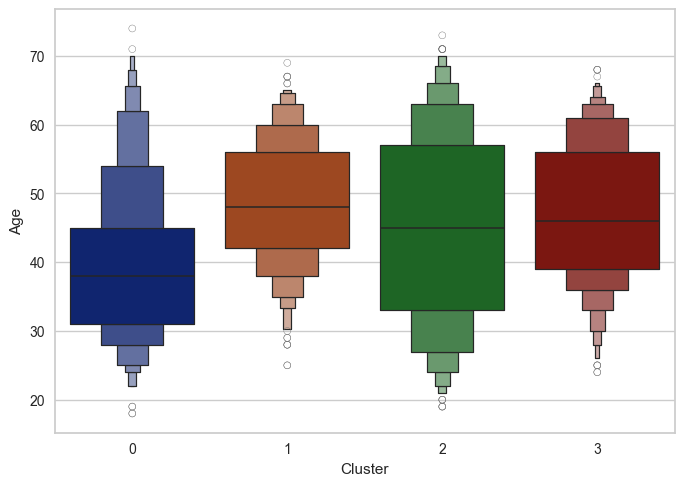

In [65]:
plt.figure()
pl=sns.boxenplot(x=raw_data["Cluster"], y=raw_data["Age"], palette='dark')
plt.show()

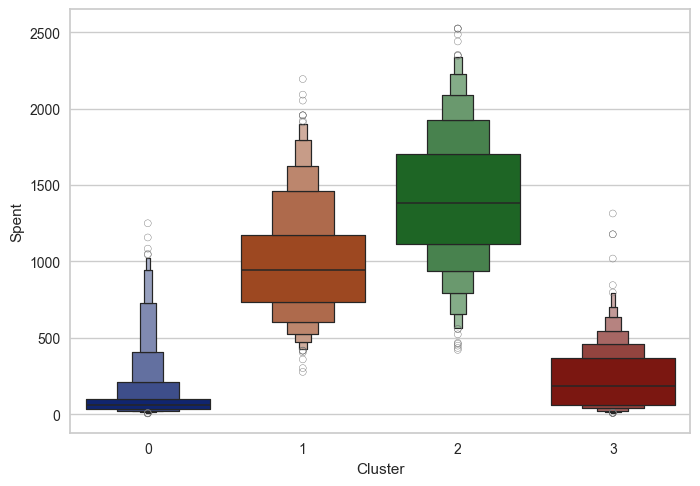

In [66]:
plt.figure()
pl=sns.boxenplot(x=raw_data["Cluster"], y=raw_data["Spent"], palette='dark')
plt.show()

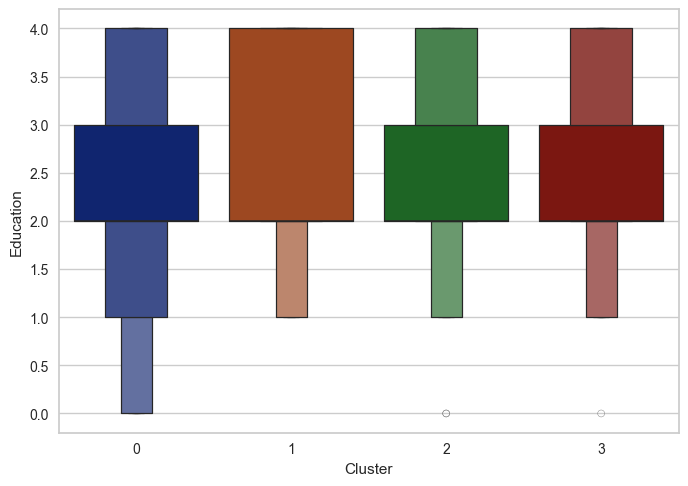

In [ ]:
plt.figure()
pl=sns.boxenplot(x=raw_data["Cluster"], y=raw_data["Education"], palette='dark')
plt.show()

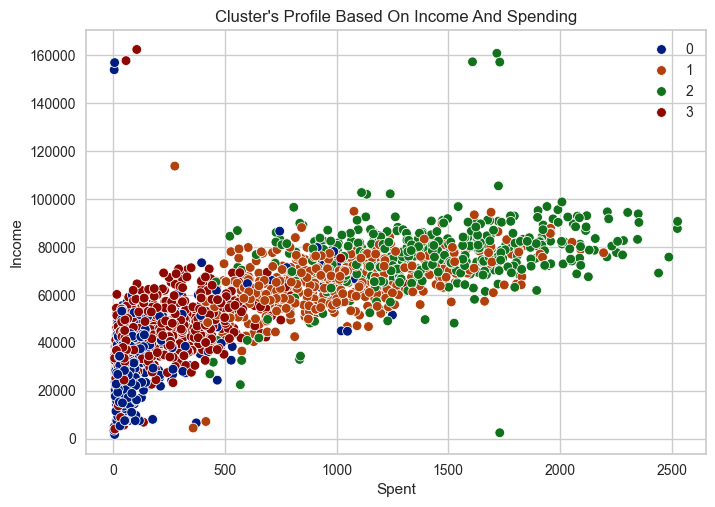

In [68]:
pl = sns.scatterplot(data = raw_data,x=raw_data["Spent"], y=raw_data["Income"],hue=raw_data["Cluster"], palette='dark')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

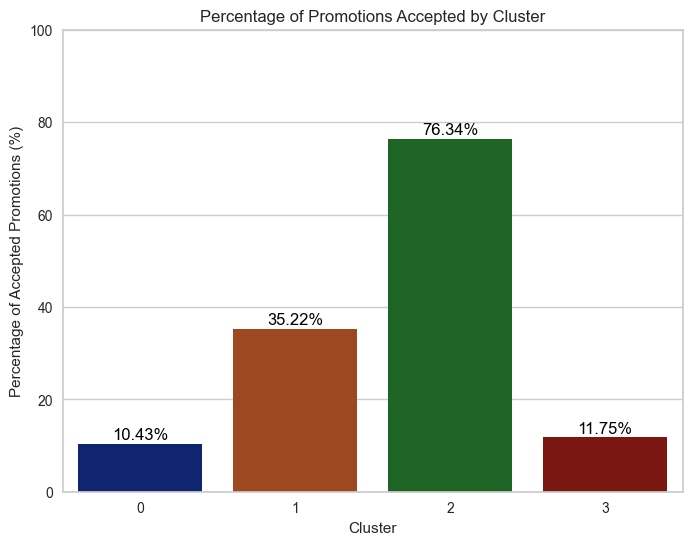

In [69]:
raw_data["Total_Promos"] = (
    raw_data["AcceptedCmp1"] + 
    raw_data["AcceptedCmp2"] + 
    raw_data["AcceptedCmp3"] + 
    raw_data["AcceptedCmp4"] + 
    raw_data["AcceptedCmp5"]
)

cluster_total = raw_data.groupby("Cluster")["ID"].count()

cluster_promos = raw_data.groupby("Cluster")["Total_Promos"].sum()

percentage_promos = (cluster_promos / cluster_total) * 100

percentage_df = percentage_promos.reset_index()
percentage_df.columns = ["Cluster", "Percentage"]

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=percentage_df, x="Cluster", y="Percentage", palette="dark")

for index, row in percentage_df.iterrows():
    ax.text(
        index,
        row["Percentage"] + 1,
        f'{row["Percentage"]:.2f}%',
        color='black',
        ha="center" 
    )

plt.title("Percentage of Promotions Accepted by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Percentage of Accepted Promotions (%)")
plt.ylim(0, 100)
plt.show()


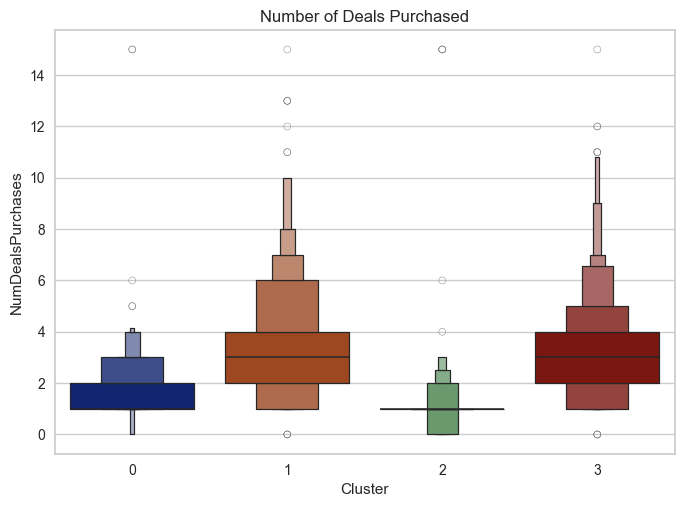

In [70]:
plt.figure()
pl=sns.boxenplot(y=raw_data["NumDealsPurchases"],x=raw_data["Cluster"], palette= 'dark')
pl.set_title("Number of Deals Purchased")
plt.show()

In [71]:
def plot_kde_grid(data, personal_vars, ydata, cluster_col, palette="dark", grid_shape=(5,3), figsize=(20, 20)):
    fig, axes = plt.subplots(nrows=grid_shape[0], ncols=grid_shape[1], figsize=figsize)
    axes = axes.flatten()

    for idx, var in enumerate(personal_vars):
        if idx < len(axes):
            sns.kdeplot(
                x=data[var],
                y=data[ydata],
                hue=data[cluster_col],
                palette=palette,
                ax=axes[idx]
            )
            axes[idx].set_title(f"{var} vs {ydata}")

    for i in range(len(personal_vars), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


In [72]:
Personal = ["Income", "Customer_For", "Age", "Family_Size", "Education", "Kidhome", "Teenhome", "Children", "Living_With", 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

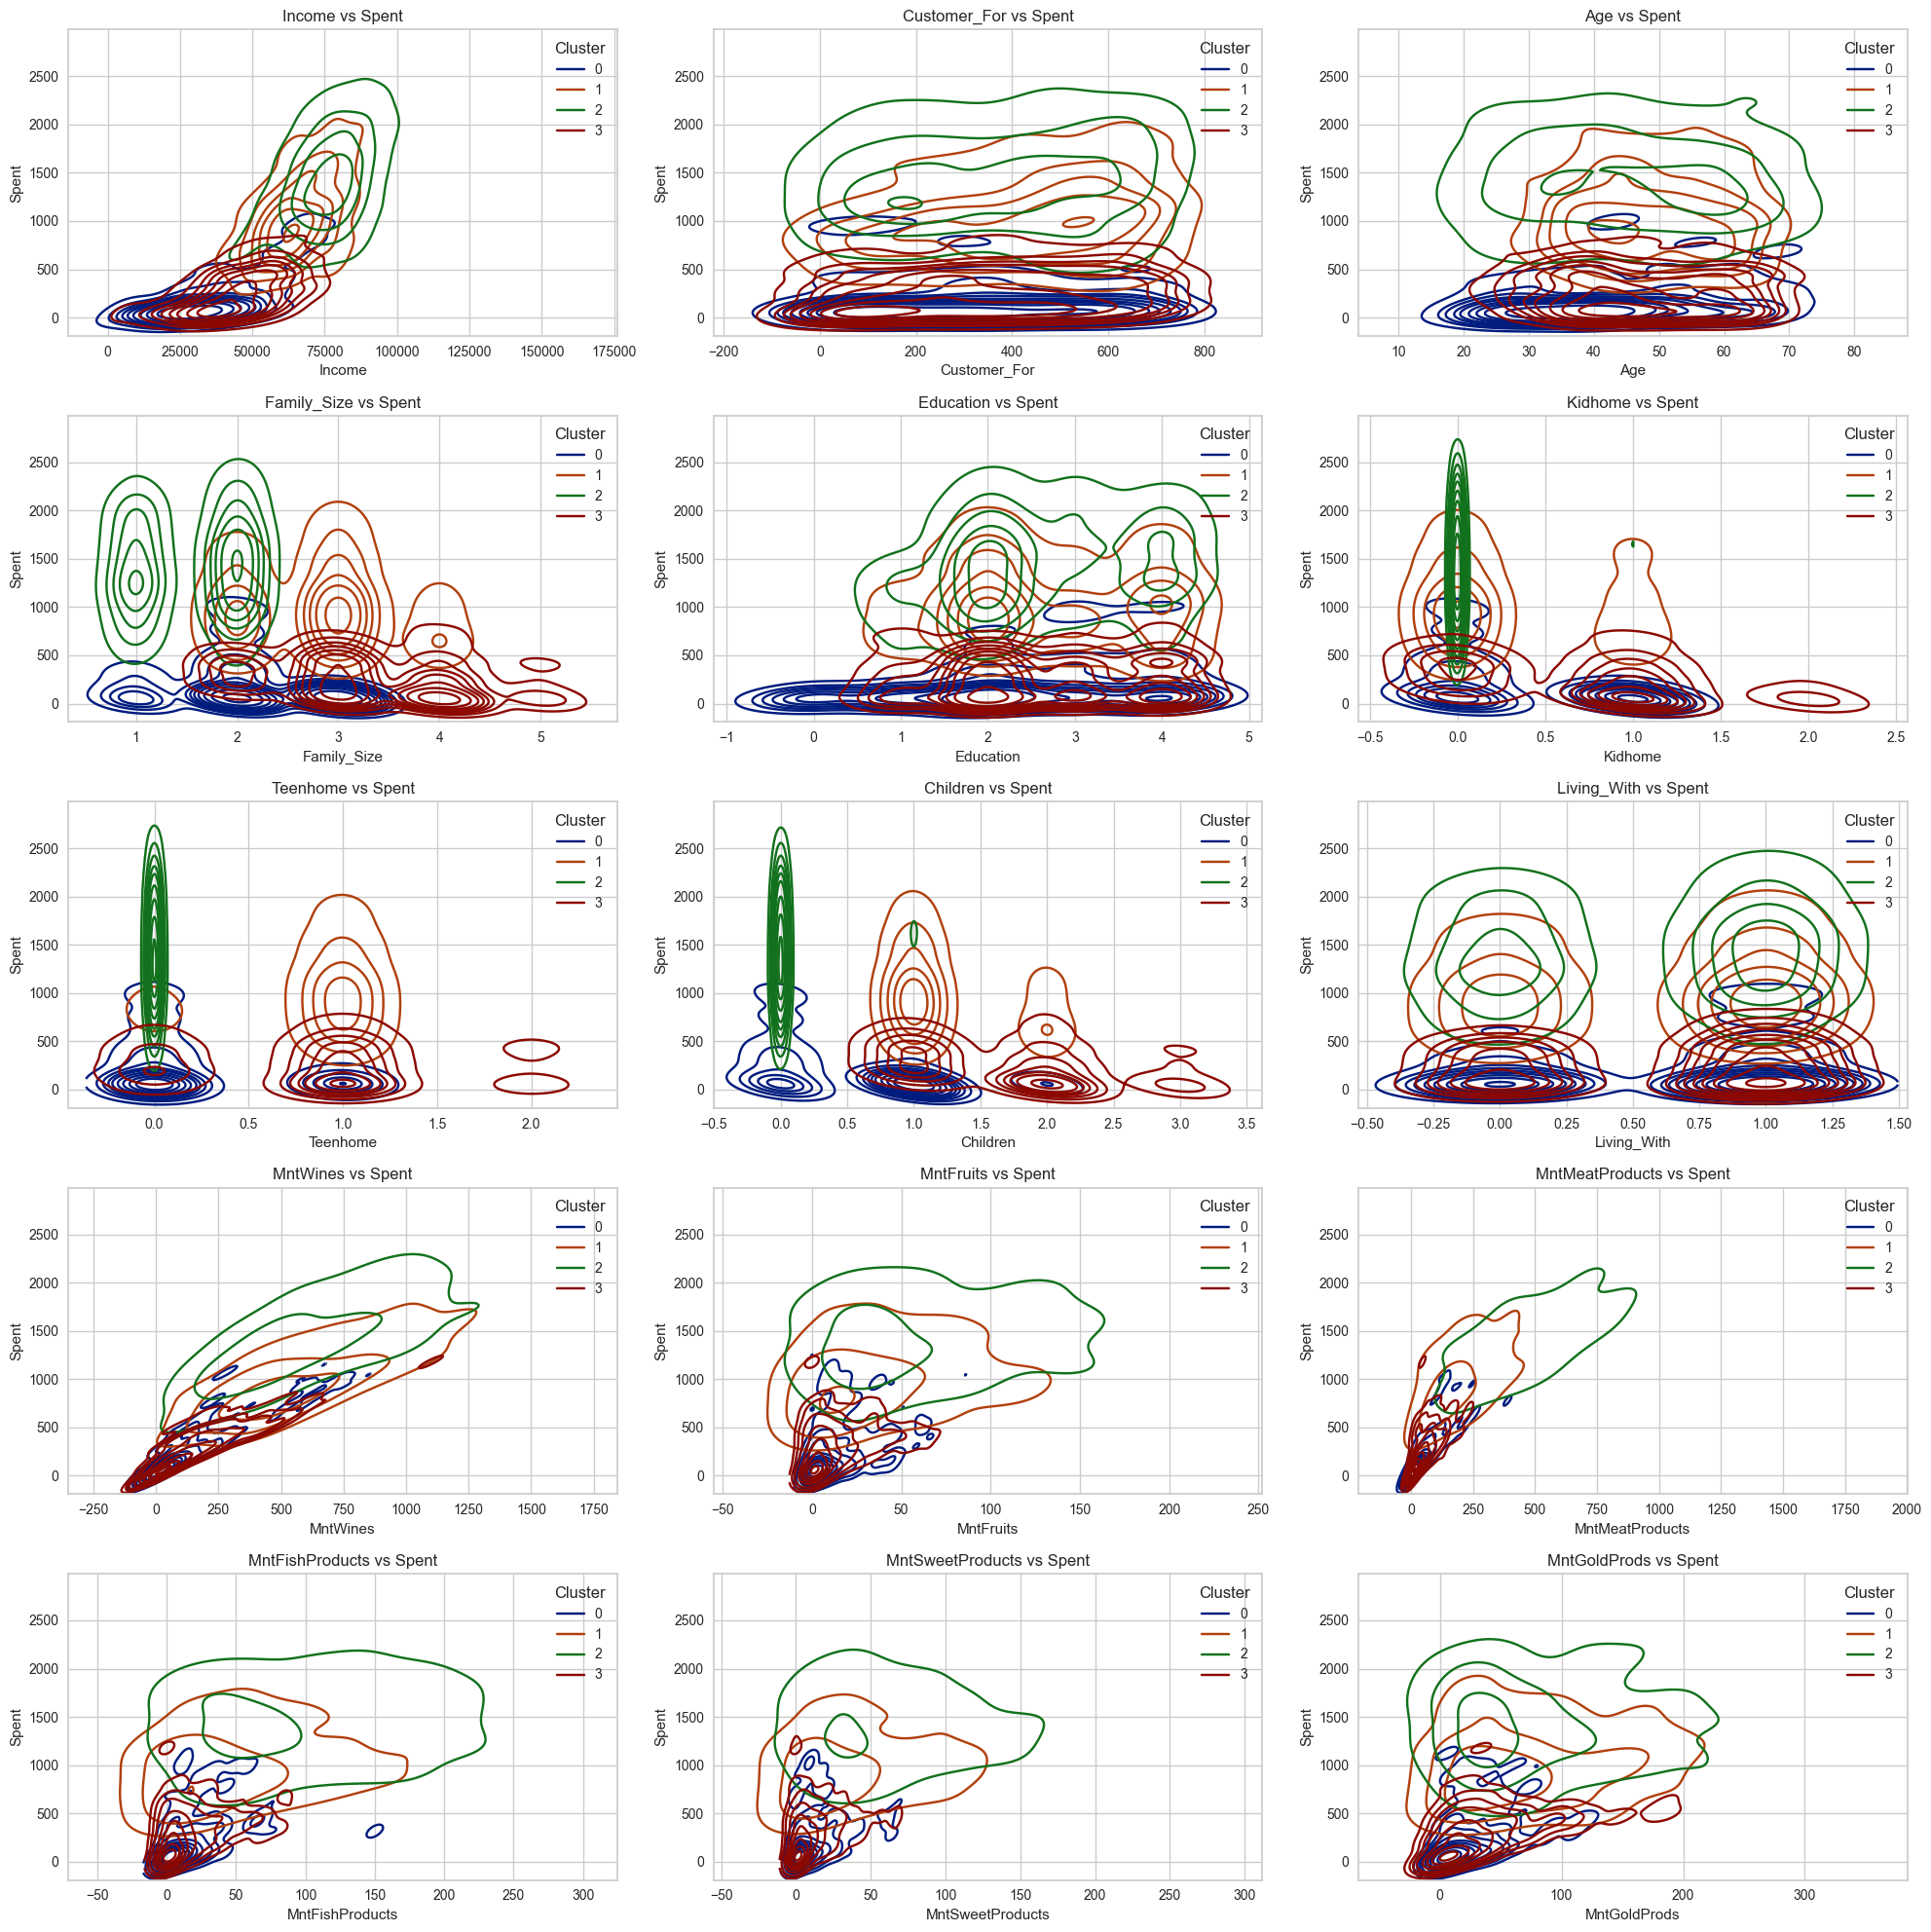

In [73]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata="Spent",
    cluster_col="Cluster"
)

# **Nhận xét về mức chi tiêu của từng cụm**

---

## **Cụm số 2**

- **Đặc điểm:**
  - Thu nhập và chi tiêu cao nhất.
  - Thường chưa có con, kích thước gia đình nhỏ (≤2).
  - Trình độ học vấn từ trung bình đến cao.
  - Chi tiêu cao đồng đều cho tất cả các mặt hàng, có xu hướng chi tiêu cao hơn nếu đang trong mối quan hệ yêu đương/hôn nhân.
  - Các mặt hàng chi tiêu bao gồm: rượu, trái cây, thịt, cá, đồ ngọt, và vàng.

- **Nhận xét:**
  - Việc chi tiêu cao đồng đều cho tất cả các mặt hàng (rượu, trái cây, thịt, cá, đồ ngọt, vàng) cho thấy cụm này có lối sống thoải mái, ít bị ràng buộc tài chính.
  - Đây là nhóm khách hàng tiềm năng cho tất cả các loại mặt hàng, đặc biệt là các sản phẩm có giá trị lớn.

---

## **Cụm số 1**

- **Đặc điểm:**
  - Thu nhập cao, chi tiêu cao.
  - Thường có 1-2 con, kích thước gia đình lớn hơn cụm 2 (đa số là 2-3 người, có ít trường hợp 4 người).
  - Con thường ở độ tuổi thiếu niên, trình độ học vấn từ trung bình đến cao.
  - Chi tiêu nhiều nhất cho vàng, sau đó là rượu, đồ ngọt, trái cây, cá, và cuối cùng là thịt.

- **Nhận xét:**
  - Đây là các gia đình đang ở giai đoạn ổn định tài chính nhưng phải cân nhắc hơn trong chi tiêu do có con cái.
  - Chi tiêu tập trung vào các mặt hàng có giá trị cao như vàng và rượu, phù hợp với các dịp lễ, tiệc hoặc tích trữ.

---

## **Cụm số 0**

- **Đặc điểm:**
  - Thu nhập và chi tiêu thấp nhất.
  - Trình độ học vấn đa dạng, thường có 1 con.
  - Chi tiêu cao hơn một chút nếu chưa có con.
  - Ưu tiên chi tiêu cho vàng, sau đó là cá, trái cây, đồ ngọt, rượu, và thịt.

- **Nhận xét:**
  - Đây là nhóm khách hàng có khả năng tài chính hạn chế, nhưng vẫn ưu tiên chi tiêu cho vàng và cá, cho thấy họ có xu hướng tập trung vào giá trị hoặc chất lượng hơn số lượng.
  - Việc chi tiêu cao hơn một chút nếu chưa có con cũng hợp lý, vì điều này giảm bớt gánh nặng tài chính.

---

## **Cụm số 3**

- **Đặc điểm:**
  - Thu nhập và chi tiêu thấp.
  - Có nhiều con nhất (đa số là 1-2 con), trình độ học vấn trung bình đến cao.
  - Chi tiêu cao nhất cho vàng, tiếp đến là rượu, và ít hơn cho các mặt hàng khác.

- **Nhận xét:**
  - Đây là nhóm khách hàng có khả năng tài chính hạn chế, có nhiều con nhất, dẫn đến áp lực tài chính lớn.
  - Chi tiêu cao cho rượu có thể liên quan đến yếu tố tâm lý, áp lực hoặc văn hóa xã hội.

---

# **Nhận xét chung về mức chi tiêu**

### **1. Mức thu nhập và chi tiêu**
- **Thu nhập** có ảnh hưởng rất lớn đến chi tiêu. Cụm 2 và cụm 1 có thu nhập cao, và chi tiêu của họ cũng cao so với 2 cụm còn lại.
- Các cụm có thu nhập thấp (cụm 0 và cụm 3) có mức chi tiêu hạn chế hơn, nhưng vẫn ưu tiên một số mặt hàng có giá trị như vàng.

### **2. So sánh cụm 2 và cụm 1**
- **Cụm 2**: Tập trung những người có học vấn cao, thu nhập cao và chưa có con, dẫn đến chi tiêu cao hơn so với cụm 1.
- **Cụm 1**: Các gia đình đã có con, chi tiêu tập trung vào một số mặt hàng và ít hơn ở các mặt hàng còn lại.

### **3. Chi tiêu theo độ tuổi của con**
- Gia đình có con ở độ tuổi thiếu niên (cụm 1) có chi tiêu cao hơn gia đình có con ở độ tuổi nhỏ hơn (cụm 3), do nhu cầu tiêu dùng và áp lực tài chính khác nhau.

### **4. Ưu tiên chi tiêu cho vàng**
- Vàng là mặt hàng được ưa chuộng nhất trong tất cả các cụm, có thể do giá trị tích lũy và tâm lý an toàn khi đầu tư.

### **5. Chi tiêu cho rượu**
- Rượu dễ tiếp cận hơn với cụm 2 và cụm 1, bởi đây là mặt hàng đắt đỏ, không quá thiết yếu, nên chỉ được mua nhiều bởi các cụm có thu nhập cao.
- **Cụm 3** có chi tiêu rượu cao hơn cụm 0, có thể do yếu tố văn hóa hoặc tâm lý (áp lực tài chính, gia đình đông con).

---

# **Kết luận**

### **1. Ảnh hưởng của thu nhập đến chi tiêu**
- Thu nhập là yếu tố quan trọng nhất ảnh hưởng đến mức độ chi tiêu.
- Các cụm có thu nhập cao (cụm 1 và cụm 2) chi tiêu nhiều hơn và có khả năng chi trả cho các mặt hàng xa xỉ như vàng và rượu.
- Các cụm có thu nhập thấp (cụm 0 và cụm 3) chi tiêu hạn chế hơn nhưng vẫn ưu tiên các mặt hàng có giá trị cao.

### **2. Tác động của cấu trúc gia đình**
- Cấu trúc gia đình và số lượng con cái ảnh hưởng lớn đến mô hình chi tiêu.
- **Cụm 2**: Kích thước gia đình nhỏ, chưa có con → chi tiêu đồng đều và ít đắn đo hơn.
- **Cụm 1**: Gia đình lớn hơn, có con → chi tiêu tập trung vào một số mặt hàng nhất định.

### **3. Yếu tố tâm lý và văn hóa**
- Số lượng con cái và áp lực tài chính có thể ảnh hưởng đến quyết định chi tiêu, đặc biệt là trong cụm 3, nơi rượu có thể được tiêu thụ nhiều hơn như một cách đối phó với căng thẳng hoặc do văn hóa xã hội.

### **4. Sự khác biệt về ưu tiên chi tiêu**
- **Vàng**: Là mặt hàng được ưa chuộng nhất trong tất cả các cụm.
- **Rượu**: Được chi tiêu nhiều hơn ở các cụm thu nhập cao (cụm 1, 2) và cụm có nhiều con (cụm 3).
- **Thực phẩm**: Được ưu tiên hơn ở các cụm có thu nhập thấp (cụm 0, 3).

### **5. Chiến lược tiếp cận thị trường**
Hiểu rõ các đặc điểm và ưu tiên chi tiêu của từng cụm sẽ giúp các doanh nghiệp phát triển các chiến lược tiếp cận thị trường hiệu quả hơn, nhằm đáp ứng nhu cầu và tối ưu hóa lợi ích cho từng nhóm khách hàng.

---

# **Phân Tích và Chiến Lược Kinh Doanh Dựa Trên Phân Cụm Khách Hàng**

Dựa trên các nhận xét và phân tích về mức chi tiêu của từng cụm, chúng ta có thể xây dựng một kế hoạch kinh doanh cụ thể nhằm tối ưu hóa doanh số bán hàng và tăng sự hài lòng của khách hàng. Dưới đây là các **insight** và **chiến lược cụ thể** để tiếp cận từng cụm khách hàng, từ đó thúc đẩy doanh số.

## **1. Cụm 2: Thu nhập cao, chi tiêu cao, gia đình nhỏ hoặc chưa có con**

### **Insight:**
- Đây là nhóm khách hàng có **thu nhập cao nhất** và sẵn sàng chi tiêu đồng đều cho tất cả các mặt hàng. 
- Họ ít bị ràng buộc tài chính và có xu hướng chi tiêu cho các sản phẩm **chất lượng cao hoặc xa xỉ**.
- Họ có lối sống thoải mái, thường tìm kiếm **trải nghiệm** hơn là chỉ đơn thuần mua sản phẩm.

### **Chiến lược bán hàng:**

#### **1. Tập trung vào sản phẩm cao cấp và trải nghiệm:**
- Quảng bá các sản phẩm **cao cấp** như rượu vang, vàng, và các thực phẩm hữu cơ (trái cây, thịt, cá).
- Tạo các **gói sản phẩm kết hợp** (VD: rượu vang + thịt nhập khẩu hoặc cá cao cấp) để tăng giá trị đơn hàng.
- Cung cấp **dịch vụ đặc biệt** như giao hàng tận nơi, đóng gói sang trọng, hoặc trải nghiệm nếm thử sản phẩm (VD: thử rượu vang tại cửa hàng).

#### **2. Chương trình khuyến mãi cá nhân hóa:**
- Gửi email hoặc tin nhắn quảng cáo các sản phẩm cao cấp dựa trên lịch sử mua sắm của họ.
- Tặng kèm quà nhỏ (VD: đồ ngọt hoặc voucher giảm giá) khi khách hàng mua các sản phẩm cao cấp.

---

## **2. Cụm 1: Thu nhập cao, chi tiêu cao, độ tuổi trung bình cao (~48), đa số có con ở độ tuổi thiếu niên, gia đình lớn hơn (2-3 người, có con)**

### **Insight:**
- Đây là nhóm khách hàng có thu nhập cao và chi tiêu khá tập trung, chủ yếu vào các mặt hàng vàng và rượu, trong khi chi tiêu ít hơn ở các mặt hàng khác.
- Họ thường thuộc các gia đình lớn hơn (2-4 người), có con cái ở độ tuổi thiếu niên, dẫn đến nhu cầu mua sắm liên quan nhiều đến sinh hoạt gia đình và các sản phẩm mang tính tiện lợi hoặc phù hợp với lối sống gia đình.
- Nhóm này có xu hướng ưu tiên các sản phẩm tích trữ, lễ tiệc (rượu), cần lên chiến lược bán hàng phù hợp.

### **Chiến lược tiếp cận và khai thác nhóm khách hàng này:**

#### **1. Tập trung vào các sản phẩm cao cấp và giá trị lớn:**
- Đẩy mạnh các sản phẩm như **vàng**, **rượu cao cấp**, hoặc các mặt hàng có giá trị cao, mang tính chất đầu tư hoặc quà tặng.
- Tạo các chương trình khuyến mãi hoặc ưu đãi đặc biệt cho các dịp lễ, tết hoặc sự kiện gia đình (ví dụ: giảm giá khi mua số lượng lớn, tặng kèm sản phẩm khi mua rượu/vàng).

#### **2. Tăng cường các sản phẩm phục vụ gia đình và tiện ích:**
- Đề xuất các mặt hàng **dành cho gia đình lớn** hoặc **phù hợp với trẻ vị thành niên**, như thực phẩm tiện lợi, đồ gia dụng thông minh, hoặc các sản phẩm phục vụ sinh hoạt gia đình.
- Cung cấp các combo sản phẩm mang tính tích trữ lâu dài hoặc sử dụng cho nhiều người (ví dụ: thực phẩm đóng hộp, đồ uống, hoặc sản phẩm gia đình dùng chung).

#### **3. Chiến lược tiếp thị hướng đến tính cá nhân hóa và gia đình:**
- Sử dụng thông điệp tiếp thị nhấn mạnh vào **giá trị gia đình**, sự tiện lợi và phong cách sống cao cấp.
- Tập trung quảng bá qua các kênh truyền thông phù hợp với nhóm tuổi (~48), như quảng cáo trên các nền tảng mạng xã hội (Facebook, YouTube), email marketing, hoặc qua các sự kiện offline (hội chợ, triển lãm).

#### **4. Tập trung vào các dịp lễ hội và sự kiện đặc biệt:**
- Tăng cường các chiến dịch bán hàng vào mùa lễ hội (Tết, Giáng sinh, sinh nhật, kỷ niệm gia đình) với các gói sản phẩm phù hợp cho tiệc tùng hoặc làm quà tặng.
- Hợp tác với các thương hiệu liên quan (như nhà hàng, khách sạn) để cung cấp các trải nghiệm cao cấp, kết hợp với việc mua sắm sản phẩm.

---

## **3. Cụm 0: Thu nhập thấp, chi tiêu thấp, gia đình nhỏ hoặc vừa**

### **Insight:**
- Đây là nhóm khách hàng **nhạy cảm với giá cả**, có thu nhập thấp nhất và chi tiêu hạn chế, nhưng vẫn ưu tiên các sản phẩm có giá trị như **vàng và cá**.
- Họ có xu hướng chi tiêu cao hơn khi chưa có con, do đó các chiến lược khuyến mãi có thể giúp tăng mức chi tiêu của nhóm này.

### **Chiến lược bán hàng:**

#### **1. Chiến lược giá cả và khuyến mãi:**
- Tập trung vào các sản phẩm có **giá cả hợp lý**, giảm giá hoặc khuyến mãi định kỳ (VD: "Mua 2 tặng 1" hoặc giảm giá 10% cho sản phẩm vàng, cá).
- Tạo các **combo sản phẩm tiết kiệm** (VD: cá + trái cây + đồ ngọt) để tăng giá trị đơn hàng.

#### **2. Tăng cường quảng bá giá trị sản phẩm:**
- Nhấn mạnh vào **chất lượng và giá trị lâu dài** của các sản phẩm như vàng hoặc thực phẩm bổ dưỡng.
- Sử dụng thông điệp tiếp thị nhấn mạnh sự tiết kiệm và lợi ích khi mua hàng (VD: "Sản phẩm chất lượng cao với giá tốt nhất").

#### **3. Chương trình khách hàng thân thiết:**
- Tạo **thẻ thành viên** hoặc chương trình tích điểm để khuyến khích họ mua sắm thường xuyên hơn.

---

## **4. Cụm 3: Thu nhập thấp, chi tiêu thấp, gia đình lớn (1-2 con trở lên)**

### **Insight:**
- Đây là nhóm khách hàng có thu nhập thấp nhưng có nhiều con, dẫn đến gánh nặng tài chính cao.
- Họ chi tiêu cao nhất cho **vàng và rượu**, có thể do yếu tố tâm lý hoặc văn hóa xã hội.

### **Chiến lược bán hàng:**

#### **1. Sản phẩm tiết kiệm chi phí:**
- Tập trung vào các sản phẩm **giá rẻ** hoặc khuyến mãi mạnh.
- Tạo các **combo sản phẩm giá rẻ dành cho gia đình lớn** (VD: rượu + đồ ngọt + trái cây).

#### **2. Chương trình hỗ trợ tài chính:**
- Cung cấp các chương trình **trả góp** hoặc giảm giá khi mua số lượng lớn (VD: giảm giá 5% khi mua trên 500.000 VNĐ).
- Tặng kèm quà nhỏ hoặc phiếu giảm giá cho các lần mua tiếp theo.

#### **3. Chiến dịch quảng bá gắn liền với cảm xúc:**
- Sử dụng thông điệp tiếp thị nhấn mạnh sự quan tâm đến gia đình và con cái (VD: "Chăm sóc gia đình bạn với những sản phẩm chất lượng, giá hợp lý").

---
